## CUSTOMER CHURN PREDICTION

**HYPOTHESIS**

Clients with high topup amounts are less likely to churn

**QUESTIONS**

Which city has the most number of clients?

Are clients who use Tigo likely to churn?

Which duration is the highest in the networks?

What is the highest packs?

**Importing Libraries**

In [1]:
#Import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
sb.set_style('darkgrid')
rcParams['figure.figsize'] = 8,8
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

**Loading Data**

In [2]:
#import data
train = pd.read_csv('Train (1).csv')
test=  pd.read_csv('Test.csv')
submission = pd.read_csv('SampleSubmission.csv')

**EDA**

In [3]:

train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,0


In [4]:
train.tail()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
1077019,56e22fe3312a48cf860b043a021dab275383a20a,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,16,NaN,NaN,0
1077020,587b72930e4d36b3fb94a18c3ef65c2079460eee,TAMBACOUNDA,K > 24 month,2500.0,5.0,2500.0,833.0,5.0,0.0,15.0,77.0,NaN,NaN,NaN,NO,34,All-net 500F=2000F;5d,2.0,0
1077021,d6831b8edacb7d9928b3f053fb1283574577ae42,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,1
1077022,cb1f6510b084173c0deae49095f35ac29f916701,NaN,K > 24 month,600.0,1.0,600.0,200.0,1.0,591.0,11.0,37.0,5.0,1.0,NaN,NO,16,All-net 600F= 3000F ;5d,1.0,0
1077023,28f56fd0d9f8d8647bb6c62e7a3f4f35f49f4d6f,FATICK,K > 24 month,1500.0,4.0,1499.0,500.0,5.0,1265.0,30.0,4.0,NaN,NaN,0.0,NO,50,On net 200F=Unlimited _call24H,2.0,0


In [5]:
train.shape

(1077024, 19)

from the above , the train data has 1077024 rows and 19 columns

In [6]:
#view the data types in the train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077024 entries, 0 to 1077023
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user_id         1077024 non-null  object 
 1   REGION          652687 non-null   object 
 2   TENURE          1077024 non-null  object 
 3   MONTANT         699139 non-null   float64
 4   FREQUENCE_RECH  699139 non-null   float64
 5   REVENUE         714669 non-null   float64
 6   ARPU_SEGMENT    714669 non-null   float64
 7   FREQUENCE       714669 non-null   float64
 8   DATA_VOLUME     547261 non-null   float64
 9   ON_NET          683850 non-null   float64
 10  ORANGE          629880 non-null   float64
 11  TIGO            432250 non-null   float64
 12  ZONE1           84898 non-null    float64
 13  ZONE2           68794 non-null    float64
 14  MRG             1077024 non-null  object 
 15  REGULARITY      1077024 non-null  int64  
 16  TOP_PACK        626129 non-null   ob

In [7]:
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,MATAM,I 18-21 month,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,NaN,NaN,NaN,NO,35,All-net 500F=2000F;5d,5.0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
2,5a4db591c953a8d8f373877fad37aaf4268899a1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NO,22,NaN,NaN
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,SAINT-LOUIS,K > 24 month,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,0.0,0.0,NaN,NO,60,"Data:1000F=2GB,30d",4.0


In [8]:
test.tail()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
190058,1092956a3dad77ceb7e8d7c70e3e13f77b60e2aa,DAKAR,F 9-12 month,500.0,1.0,506.0,169.0,1.0,0.0,26.0,NaN,NaN,6.0,NaN,NO,14,All-net 500F=2000F;5d,1.0
190059,bec10becca7faa8e9cab9981b3aee5e9a7f04828,DAKAR,K > 24 month,2000.0,4.0,2000.0,667.0,5.0,0.0,8.0,54.0,NaN,NaN,NaN,NO,29,All-net 500F =2000F_AllNet_Unlimited,3.0
190060,7ac6fc191f8732b1b146e57f9ede983626b93eae,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
190061,d592c81971d6120b0d19f9ace85f278ea21b89a0,NaN,K > 24 month,300.0,2.0,298.0,99.0,2.0,0.0,1.0,2.0,NaN,NaN,NaN,NO,12,NaN,NaN
190062,9b4f57aeef72cd52c634498d0ea27ea3fbb67bf4,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN


In [9]:
test.shape

(190063, 18)

from the above, the test data has 190063 rows and 18 columns

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190063 entries, 0 to 190062
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         190063 non-null  object 
 1   REGION          115330 non-null  object 
 2   TENURE          190063 non-null  object 
 3   MONTANT         123695 non-null  float64
 4   FREQUENCE_RECH  123695 non-null  float64
 5   REVENUE         126422 non-null  float64
 6   ARPU_SEGMENT    126422 non-null  float64
 7   FREQUENCE       126422 non-null  float64
 8   DATA_VOLUME     96716 non-null   float64
 9   ON_NET          120771 non-null  float64
 10  ORANGE          111417 non-null  float64
 11  TIGO            76555 non-null   float64
 12  ZONE1           14850 non-null   float64
 13  ZONE2           12011 non-null   float64
 14  MRG             190063 non-null  object 
 15  REGULARITY      190063 non-null  int64  
 16  TOP_PACK        110773 non-null  object 
 17  FREQ_TOP_P

In [11]:
submission.head()

,user_id,CHURN
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,0
2,5a4db591c953a8d8f373877fad37aaf4268899a1,0
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,0
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,0


In [12]:
submission.shape

(190063, 2)

In [13]:
#Check how many levels are involved in each of the categorical features (object)

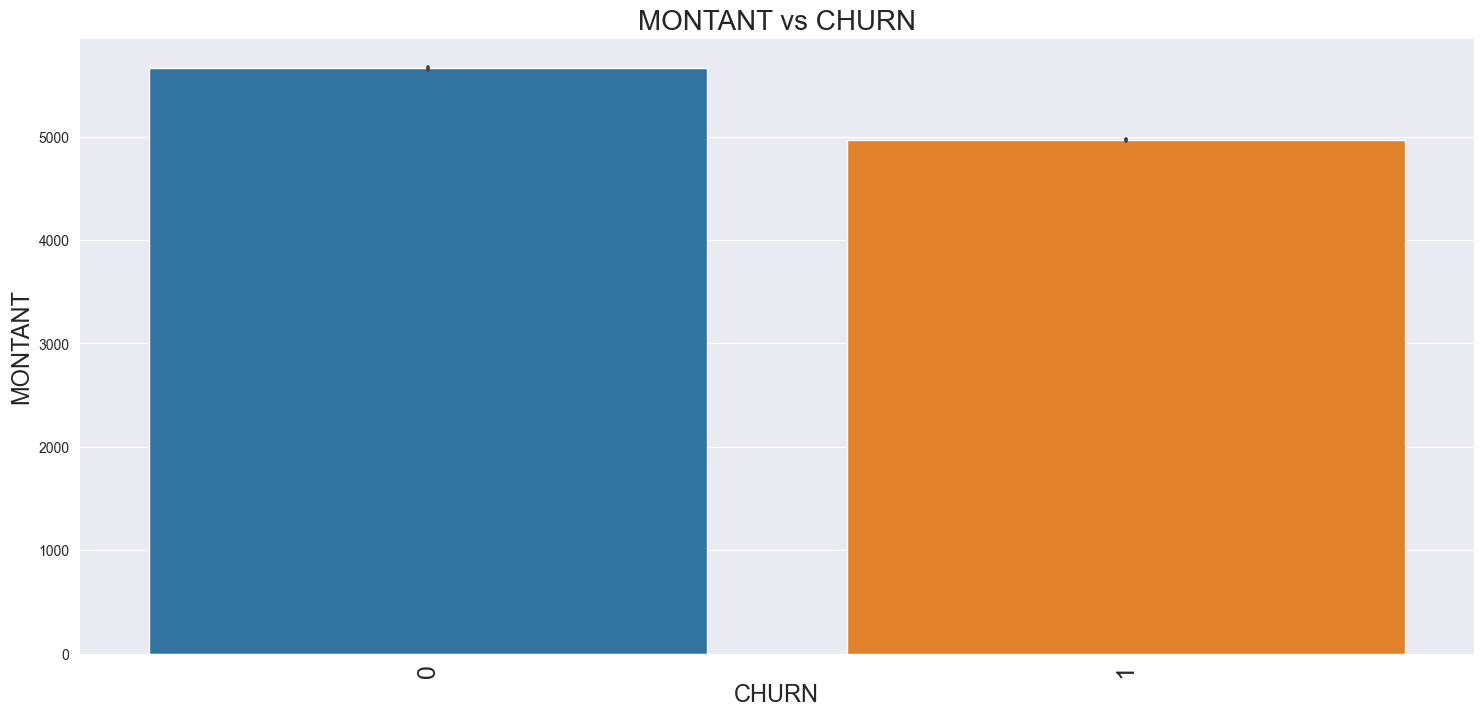

In [91]:
#Montant vs churn

plots = plt.figure(figsize=(18,8))
plots = plt.title('MONTANT vs CHURN',fontsize=20)
plots = plt.xticks((0,1))
plots = plt.xticks(fontsize=18,rotation='vertical')
plots = plt.xlabel('CHURN',fontsize=17)
plots = plt.ylabel('MONTANT',fontsize=17)
plots = sb.barplot(x='CHURN',y='MONTANT',data = train )
plt.savefig('montantchurn.png',dpi=300)


The higher the topup amount, the lesser the chance to churn but the lower the topup amount the higher risk of churning.

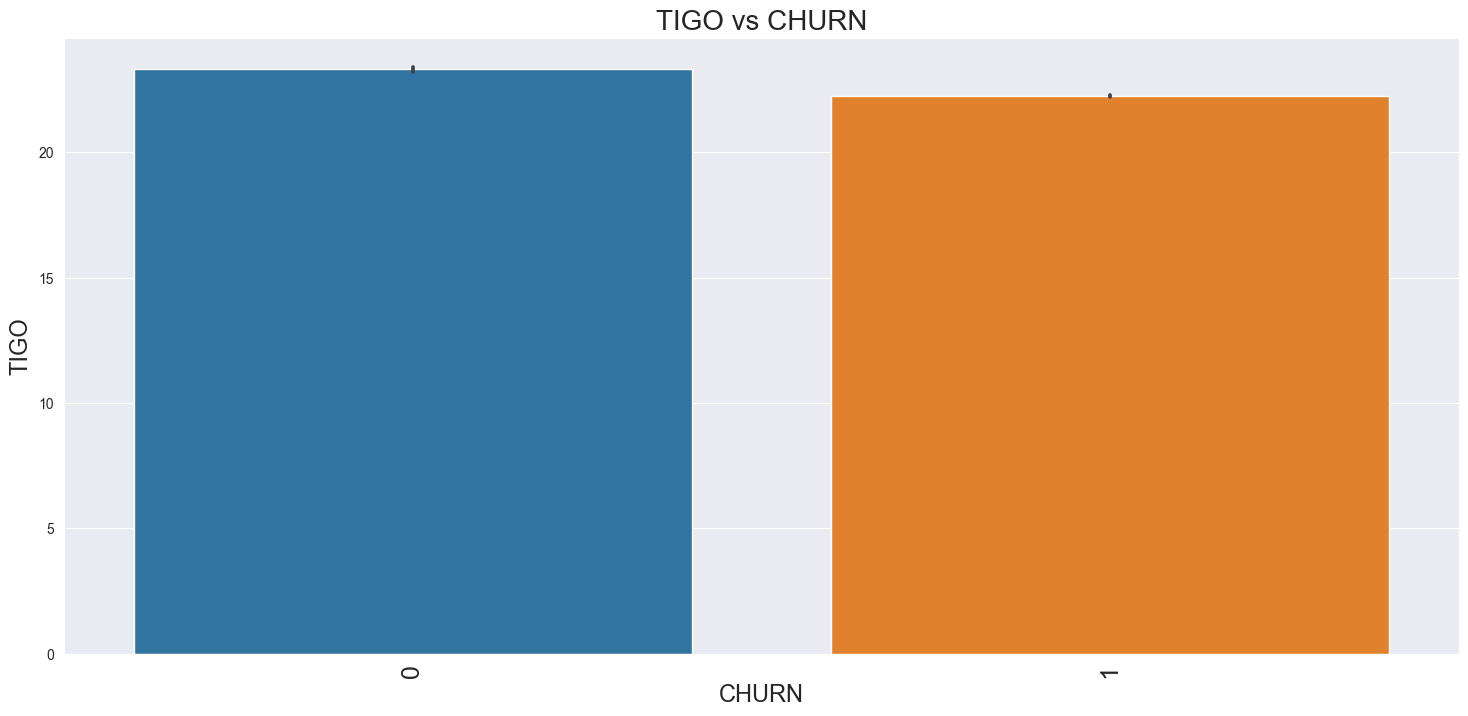

In [92]:
#TIGO VS CHURN

plots = plt.figure(figsize=(18,8))
plots = plt.title('TIGO vs CHURN',fontsize=20)
plots = plt.xticks((0,1))
plots = plt.xticks(fontsize=18,rotation='vertical')
plots = plt.xlabel('CHURN',fontsize=17)
plots = plt.ylabel('TIGO',fontsize=17)
plots = sb.barplot(x='CHURN',y='TIGO',data = train )
plt.savefig('tigochurn.png',dpi=300)

clients who call tigo more are less likely to churn

DAKAR          256259
THIES           90171
SAINT-LOUIS     59895
LOUGA           49679
KAOLACK         48498
DIOURBEL        33564
TAMBACOUNDA     27562
KAFFRINE        22067
KOLDA           19464
FATICK          17775
MATAM           14650
ZIGUINCHOR      11036
SEDHIOU          1553
KEDOUGOU          514
Name: REGION, dtype: int64


Text(0.5, 0, 'REGION')

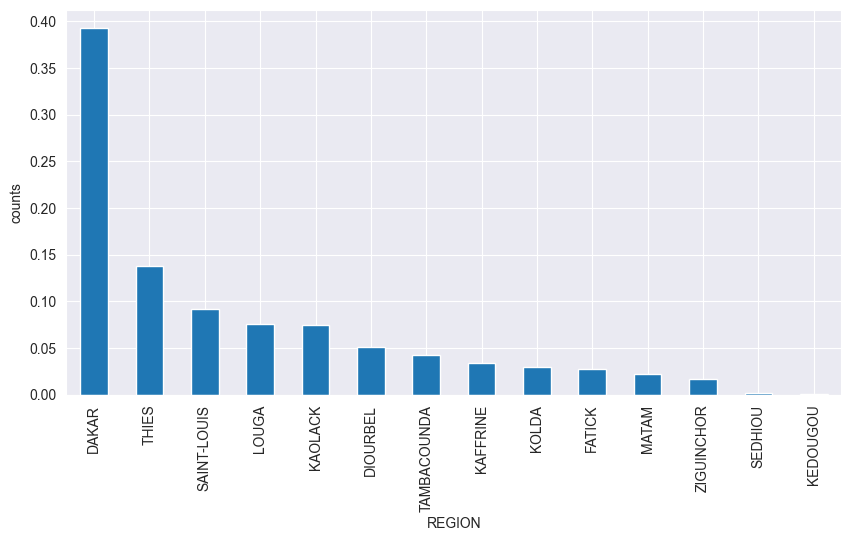

In [14]:
print(train['REGION'].value_counts())
plt.figure(figsize=(10,5))
train['REGION'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('REGION')

Most Clients are located in **Darkar**. in other words, Darkar is the region with most clients. Fllowed by **Thies** and **Saint-Louis**. And the region with the least number of client is **KEDOUGOU**

K > 24 month     1021853
I 18-21 month      22494
H 15-18 month      12913
G 12-15 month       7520
J 21-24 month       6324
F 9-12 month        4604
E 6-9 month          929
D 3-6 month          387
Name: TENURE, dtype: int64


Text(0.5, 0, 'TENURE')

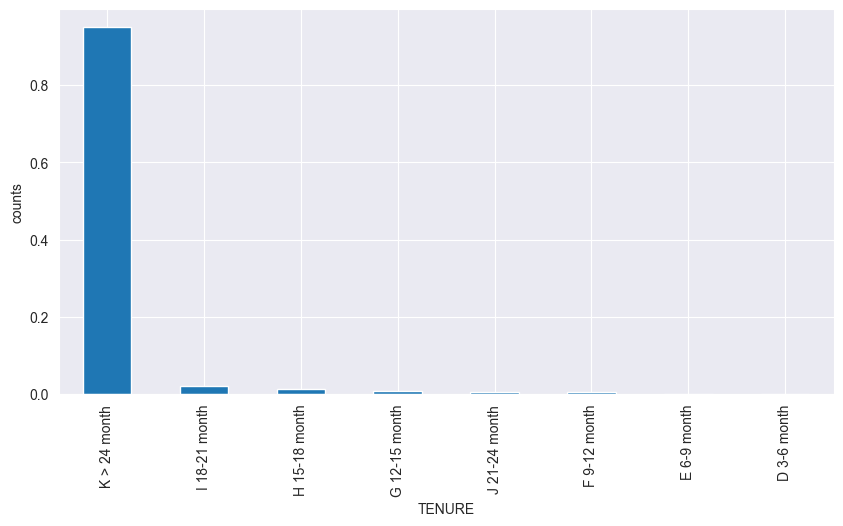

In [15]:
print(train['TENURE'].value_counts())
plt.figure(figsize=(10,5))
train['TENURE'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TENURE')

The duration K > 24 months is the highest in the networks.

NO    1077024
Name: MRG, dtype: int64


Text(0.5, 0, 'MRG')

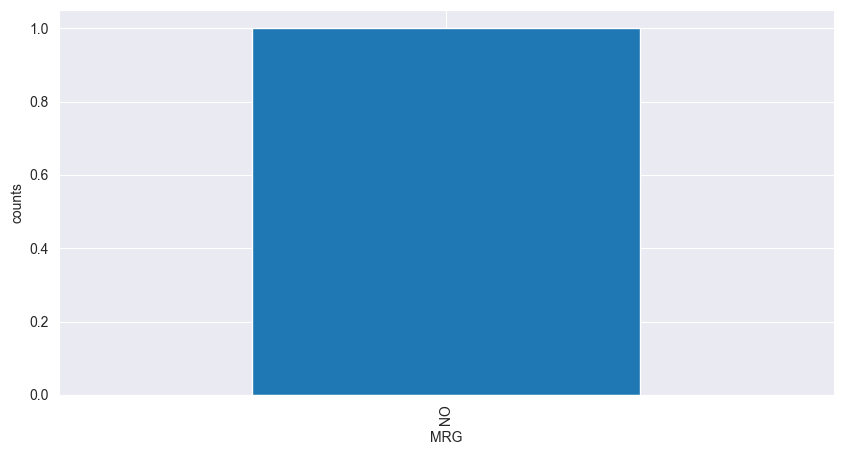

In [16]:
print(train['MRG'].value_counts())
plt.figure(figsize=(10,5))
train['MRG'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('MRG')

Number of clients who are not going are more

All-net 500F=2000F;5d             158779
On net 200F=Unlimited _call24H     76302
Data:490F=1GB,7d                   57679
Data: 100 F=40MB,24H               42515
Mixt 250F=Unlimited_call24H        33620
                                   ...  
150=unlimited pilot auto               1
FIFA_TS_weekly                         1
Data_Mifi_10Go_Monthly                 1
Data_Mifi_20Go                         1
200=unlimited pilot auto               1
Name: TOP_PACK, Length: 126, dtype: int64


Text(0.5, 0, 'TOP_PACK')

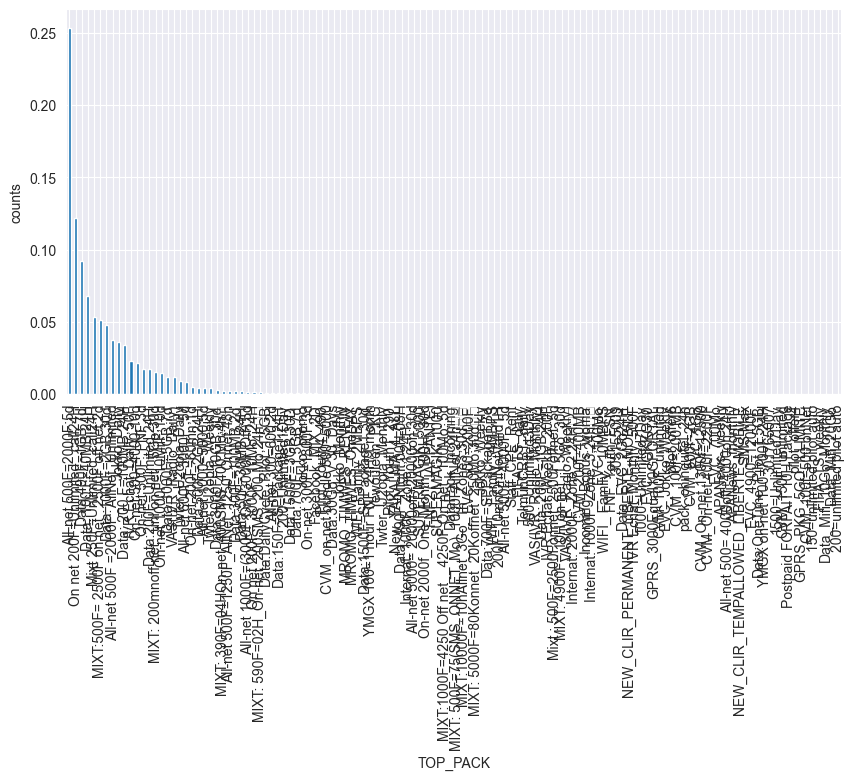

In [17]:
#probaly not the best way to visualize this
print(train['TOP_PACK'].value_counts())
plt.figure(figsize=(10,5))
train['TOP_PACK'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TOP_PACK')

The highest most active packs(Top Pack) are **All-net 500F=2000F;5d** , followed by  **On net 200F=Unlimited _call24H**

0    875031
1    201993
Name: CHURN, dtype: int64


Text(0.5, 0, 'Churn')

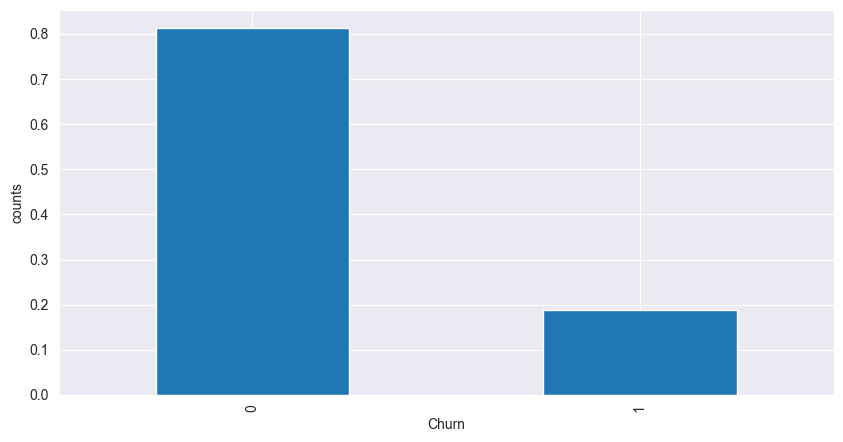

In [18]:
#Check if the predictor class is balanced 
print(train['CHURN'].value_counts())
plt.figure(figsize=(10,5))
train['CHURN'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('Churn')

**We have an imbalanced data.(because there is an unequal distribution between people who churn and people who didnt churn)**
0(people who did not churn) are a lot more than 1(people who churned)

In [19]:
#Check summary of numerical fields
train.select_dtypes(include=['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,699139.0,5529.210895,7104.737952,20.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,699139.0,11.523756,13.261938,1.0,2.0,7.0,16.0,131.0
REVENUE,714669.0,5506.050798,7175.625010,1.0,1000.0,3000.0,7360.0,532177.0
ARPU_SEGMENT,714669.0,1835.355961,2391.870902,0.0,333.0,1000.0,2453.0,177392.0
FREQUENCE,714669.0,13.974439,14.687059,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,547261.0,3368.801722,12898.928039,0.0,0.0,258.0,2905.0,1702309.0
ON_NET,683850.0,277.065798,874.315378,0.0,5.0,27.0,156.0,50809.0
ORANGE,629880.0,95.160804,203.020261,0.0,7.0,29.0,99.0,12040.0
TIGO,432250.0,23.105018,64.035464,0.0,2.0,6.0,20.0,4174.0
ZONE1,84898.0,8.167483,39.245883,0.0,0.0,1.0,3.0,2507.0


In [20]:
#Check for missing values in training data
train.isnull().sum()

user_id                 0
REGION             424337
TENURE                  0
MONTANT            377885
FREQUENCE_RECH     377885
REVENUE            362355
ARPU_SEGMENT       362355
FREQUENCE          362355
DATA_VOLUME        529763
ON_NET             393174
ORANGE             447144
TIGO               644774
ZONE1              992126
ZONE2             1008230
MRG                     0
REGULARITY              0
TOP_PACK           450895
FREQ_TOP_PACK      450895
CHURN                   0
dtype: int64

In [21]:
#Check for missing values in test data
test.isnull().sum()

user_id                0
REGION             74733
TENURE                 0
MONTANT            66368
FREQUENCE_RECH     66368
REVENUE            63641
ARPU_SEGMENT       63641
FREQUENCE          63641
DATA_VOLUME        93347
ON_NET             69292
ORANGE             78646
TIGO              113508
ZONE1             175213
ZONE2             178052
MRG                    0
REGULARITY             0
TOP_PACK           79290
FREQ_TOP_PACK      79290
dtype: int64

In [22]:
#We will drop REGION, TOP_PACK, and MRG
#We will also replace the missing values for the numerical columns with their means (averages)

In [23]:
train.drop(columns=['REGION', 'MRG', 'TOP_PACK'], inplace=True) #drop these columns

In [24]:
train.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,62,30.0,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0
3,364ec1b424cdc64c25441a444a16930289a0051e,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,61,7.0,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,56,11.0,0


In [25]:
test.drop(columns=['REGION', 'MRG', 'TOP_PACK'], inplace=True)

In [26]:
test.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,I 18-21 month,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,NaN,NaN,NaN,35,5.0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
2,5a4db591c953a8d8f373877fad37aaf4268899a1,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,22,NaN
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,K > 24 month,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,0.0,0.0,NaN,60,4.0


In [27]:
#Fill NAs for train data

In [28]:
train['MONTANT'].fillna((train['MONTANT'].mean()), inplace=True)
train['FREQUENCE_RECH'].fillna((train['FREQUENCE_RECH'].mean()), inplace=True)
train['REVENUE'].fillna((train['REVENUE'].mean()), inplace=True)
train['ARPU_SEGMENT'].fillna((train['ARPU_SEGMENT'].mean()), inplace=True)
train['FREQUENCE'].fillna((train['FREQUENCE'].mean()), inplace=True)
train['DATA_VOLUME'].fillna((train['DATA_VOLUME'].mean()), inplace=True)
train['ON_NET'].fillna((train['ON_NET'].mean()), inplace=True)
train['ORANGE'].fillna((train['ORANGE'].mean()), inplace=True)
train['TIGO'].fillna((train['TIGO'].mean()), inplace=True)
train['ZONE1'].fillna((train['ZONE1'].mean()), inplace=True)
train['ZONE2'].fillna((train['ZONE2'].mean()), inplace=True)
train['FREQ_TOP_PACK'].fillna((train['FREQ_TOP_PACK'].mean()), inplace=True)

In [29]:
train.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,K > 24 month,20000.000000,47.000000,21602.000000,7201.000000,52.000000,8835.000000,3391.000000,396.000000,185.000000,8.167483,7.709844,62,30.000000,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,K > 24 month,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,23.105018,8.167483,7.709844,3,9.262446,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,K > 24 month,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,23.105018,8.167483,7.709844,1,9.262446,0
3,364ec1b424cdc64c25441a444a16930289a0051e,K > 24 month,7900.000000,19.000000,7896.000000,2632.000000,25.000000,9385.000000,27.000000,46.000000,20.000000,8.167483,2.000000,61,7.000000,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,K > 24 month,12350.000000,21.000000,12351.000000,4117.000000,29.000000,9360.000000,66.000000,102.000000,34.000000,8.167483,7.709844,56,11.000000,0


In [30]:
train.isnull().sum()

user_id           0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [31]:
#Fill NAs for test data

In [32]:
test['MONTANT'].fillna((test['MONTANT'].mean()), inplace=True)
test['FREQUENCE_RECH'].fillna((test['FREQUENCE_RECH'].mean()), inplace=True)
test['REVENUE'].fillna((test['REVENUE'].mean()), inplace=True)
test['ARPU_SEGMENT'].fillna((test['ARPU_SEGMENT'].mean()), inplace=True)
test['FREQUENCE'].fillna((test['FREQUENCE'].mean()), inplace=True)
test['DATA_VOLUME'].fillna((test['DATA_VOLUME'].mean()), inplace=True)
test['ON_NET'].fillna((test['ON_NET'].mean()), inplace=True)
test['ORANGE'].fillna((test['ORANGE'].mean()), inplace=True)
test['TIGO'].fillna((test['TIGO'].mean()), inplace=True)
test['ZONE1'].fillna((test['ZONE1'].mean()), inplace=True)
test['ZONE2'].fillna((test['ZONE2'].mean()), inplace=True)
test['FREQ_TOP_PACK'].fillna((test['FREQ_TOP_PACK'].mean()), inplace=True)

In [33]:
test.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,I 18-21 month,2500.000000,5.00000,2500.000000,833.000000,5.00000,0.000000,64.000000,70.000000,22.95227,8.135421,7.696944,35,5.000000
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,K > 24 month,5506.547759,11.48394,5486.233417,1828.750281,13.93967,3358.421151,281.210613,94.611639,22.95227,8.135421,7.696944,2,9.234326
2,5a4db591c953a8d8f373877fad37aaf4268899a1,K > 24 month,5506.547759,11.48394,5486.233417,1828.750281,13.93967,0.000000,281.210613,94.611639,22.95227,8.135421,7.696944,22,9.234326
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,K > 24 month,5506.547759,11.48394,5486.233417,1828.750281,13.93967,3358.421151,281.210613,94.611639,22.95227,8.135421,7.696944,6,9.234326
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,K > 24 month,5100.000000,7.00000,5637.000000,1879.000000,15.00000,7783.000000,30.000000,24.000000,0.00000,0.000000,7.696944,60,4.000000


In [34]:
test.isnull().sum()

user_id           0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
FREQ_TOP_PACK     0
dtype: int64

## Machine Learning

In [35]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_recall_curve, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

In [36]:
dropcols = ['user_id', 'CHURN']
y = train['CHURN']
x = train.drop(columns=dropcols, axis=1)
test = test.drop(columns=['user_id'], axis=1) #you will use this for predicting and submitting the resulting
print(x.shape)
print(y.shape)
print(test.shape)

(1077024, 14)
(1077024,)
(190063, 14)


**Splitting data into train and test set**

In [37]:
#Split training data into train and test split

In [38]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.5,random_state=1)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(538512, 14)
(538512,)
(538512, 14)
(538512,)


In [39]:
#Further split X_train and y_train into train and validation sets

In [40]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.3, random_state=1)

In [41]:
print("train")
print(X_train.shape)
print(y_train.shape)
print("+"*7)
print("test")
print(X_test.shape)
print(y_test.shape)
print("+"*7)
print("validation")
print(X_val.shape)
print(y_val.shape)

train
(376958, 14)
(376958,)
+++++++
test
(538512, 14)
(538512,)
+++++++
validation
(161554, 14)
(161554,)


**Standardization**

In [42]:
#Standardize numeric columns

In [43]:
num_cols = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2',
       'REGULARITY', 'FREQ_TOP_PACK']

In [44]:
scaler = StandardScaler()

In [45]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [46]:
X_train.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
799472,K > 24 month,1.022970,0.889686,1.127881,1.127710,1.927184,0.389218,-0.317321,-0.290984,-0.510194,-0.000005,0.723281,1.478598,-0.348810
295570,J 21-24 month,0.203177,0.139290,0.353855,0.353853,0.588023,0.875619,-0.393770,-0.541835,-0.586660,-0.000005,-0.230646,1.209397,-0.027868
929179,K > 24 month,0.473534,0.795886,0.460594,0.460592,0.839115,-0.337908,-0.074993,1.555015,2.930798,-0.000005,0.002364,1.523465,0.079113
787349,K > 24 month,-0.878252,-0.986303,-0.856875,-0.856709,-1.085930,-0.001634,-0.338958,-0.535403,0.002260,-0.000005,0.002364,1.074797,-0.883713
965538,K > 24 month,-0.948021,-0.986303,-0.928206,-0.928039,-1.085930,-0.309351,-0.388000,-0.612587,0.002260,-0.000005,0.002364,-0.944210,-0.883713


In [47]:
X_test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
711285,K > 24 month,-0.001037,0.000819,-0.000563,-0.000563,-3.557674e-08,-0.348940,0.000108,-0.000508,0.002260,-0.000005,0.002364,-0.495542,0.000209
997846,K > 24 month,-0.703828,-0.329707,-0.685820,-0.685824,-5.000463e-01,-0.314815,-0.213467,-0.528970,-0.229817,-0.000005,0.002364,-0.630142,-0.776733
873285,K > 24 month,0.272946,0.983485,0.358473,0.358471,1.173906e+00,-0.001634,0.799118,0.937538,-0.535682,-0.000005,0.002364,0.670995,1.041940
945973,K > 24 month,-0.001037,0.000819,-0.000563,-0.000563,-3.557674e-08,-0.348940,0.000108,-0.000508,0.002260,-0.000005,0.002364,0.356928,0.000209
1063939,K > 24 month,-0.001037,0.000819,-0.000563,-0.000563,-3.557674e-08,-0.001634,0.000108,-0.000508,0.002260,-0.000005,0.002364,-0.944210,0.000209


In [48]:
test[num_cols] = scaler.transform(test[num_cols])

In [49]:
test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
0,I 18-21 month,-0.529404,-0.611105,-0.514765,-0.514940,-0.751139,-0.348940,-0.307224,-0.162343,-0.001634,-0.002870,0.000606,0.312061,-0.455791
1,K > 24 month,-0.004990,-0.002915,-0.003953,-0.003953,-0.002910,-0.002704,0.006086,-0.004040,-0.001634,-0.002870,0.000606,-1.168544,-0.002799
2,K > 24 month,-0.004990,-0.002915,-0.003953,-0.003953,-0.002910,-0.348940,0.006086,-0.004040,-0.001634,-0.002870,0.000606,-0.271208,-0.002799
3,K > 24 month,-0.004990,-0.002915,-0.003953,-0.003953,-0.002910,-0.002704,0.006086,-0.004040,-0.001634,-0.002870,0.000606,-0.989077,-0.002799
4,K > 24 month,-0.075902,-0.423506,0.021836,0.021834,0.085837,0.453446,-0.356267,-0.458218,-0.586660,-0.729836,0.000606,1.433731,-0.562771


In [50]:
X_val[num_cols] = scaler.transform(X_val[num_cols])

In [51]:
X_val.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
917325,K > 24 month,-0.001037,0.000819,-0.000563,-0.000563,-3.557674e-08,-0.001634,0.000108,-0.000508,0.00226,-0.000005,0.002364,-1.213411,0.000209
694916,K > 24 month,-0.001037,0.000819,-0.000563,-0.000563,-3.557674e-08,-0.001634,0.000108,-0.000508,0.00226,-0.000005,0.002364,-0.809609,-0.883713
1023253,K > 24 month,-0.001037,0.000819,-0.000563,-0.000563,-3.557674e-08,-0.001634,0.000108,-0.000508,0.00226,-0.000005,0.002364,-1.213411,0.000209
584285,K > 24 month,-0.703828,-0.611105,-0.685991,-0.685824,-6.674415e-01,-0.347805,-0.383673,-0.368169,0.00226,-0.000005,0.002364,-0.630142,-0.776733
446284,K > 24 month,0.464813,1.264883,0.499423,0.499592,1.090208e+00,-0.348940,1.100586,0.204284,0.00226,-0.000005,0.002364,1.523465,-0.134848


**Label Encoding**

In [52]:
#Encode the TENURE column

encoder = LabelEncoder()

X_train["TENURE"] = encoder.fit_transform(X_train["TENURE"])

X_test["TENURE"] = encoder.transform(X_test["TENURE"])

X_val['TENURE'] = encoder.transform(X_val["TENURE"])

test['TENURE'] = encoder.transform(test["TENURE"])

In [53]:
X_train.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
799472,7,1.022970,0.889686,1.127881,1.127710,1.927184,0.389218,-0.317321,-0.290984,-0.510194,-0.000005,0.723281,1.478598,-0.348810
295570,6,0.203177,0.139290,0.353855,0.353853,0.588023,0.875619,-0.393770,-0.541835,-0.586660,-0.000005,-0.230646,1.209397,-0.027868
929179,7,0.473534,0.795886,0.460594,0.460592,0.839115,-0.337908,-0.074993,1.555015,2.930798,-0.000005,0.002364,1.523465,0.079113
787349,7,-0.878252,-0.986303,-0.856875,-0.856709,-1.085930,-0.001634,-0.338958,-0.535403,0.002260,-0.000005,0.002364,1.074797,-0.883713
965538,7,-0.948021,-0.986303,-0.928206,-0.928039,-1.085930,-0.309351,-0.388000,-0.612587,0.002260,-0.000005,0.002364,-0.944210,-0.883713


**Balancing of Data**

As shown previously, we are dealing with an imbalanced dataset. The BorderlineSMOTE method will be used to balance the data, which involves selecting those instances of the minority class that are misclassified, such as with a k-nearest neighbor classification model

In [54]:
# balance data
from imblearn.over_sampling import BorderlineSMOTE

oversample = BorderlineSMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

**Training First Model**

In [55]:
##RandomForestClassifier Model

In [56]:
rand = RandomForestClassifier(bootstrap=True,criterion = "gini",
                              n_jobs=-1,
                              max_depth=7,
                              n_estimators=200,
                              random_state=1,
                             verbose=True)

In [57]:
#Fit model on data
randmodel = rand.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   49.6s finished


In [58]:
#Predict on the X_test data 
randpred = randmodel.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    4.7s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    5.1s finished


In [59]:
print("Acuracy")
accuracy_score(y_test, randpred)

Acuracy


0.7569654900912143

In [60]:
print("Recall")
recall_score(y_test, randpred)

Recall


0.9146504114840099

In [61]:
print("F1 Score")
f1_score(y_test, randpred)

F1 Score


0.5858807671253682

In [62]:
confusion_matrix(y_test, randpred)

array([[315055, 122238],
       [  8639,  92580]], dtype=int64)

**Training other models**

In [63]:
#Defining the modelling function
def modeling(alg, alg_name, params={}):
    model = alg(**params) #Instantiating the algorithm class and unpacking parameters if any
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    #Performance evaluation
    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)                            
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)
        f_score_2 = fbeta_score(y_test, y_pred, beta=2.0)
        print("f2_score: ",f_score_2)

    print_scores(alg, y_test, y_pred)
    return model

In [64]:
#Decision tree
dt_model = modeling(DecisionTreeClassifier, "Decision Tree Classification")

Decision Tree Classification
accuracy:  0.7931875241405948
precision:  0.47026640736662056
recall:  0.793151483417145
f1_score:  0.8106882663171336
f2_score:  0.6973863431041433


In [77]:
#AdaBoost
              
AdaBoost_model = modeling(AdaBoostClassifier, "AdaBoost Classifier")

AdaBoost Classifier
accuracy:  0.7720403630745462
precision:  0.4466884466884467
recall:  0.891532222211245
f1_score:  0.7950807371084346
f2_score:  0.7434552213229285


In [78]:
xgb_model = modeling(XGBClassifier, "XG Boost classifier")

XG Boost classifier
accuracy:  0.8068325311227976
precision:  0.4918180120453803
recall:  0.8325907191337595
f1_score:  0.823263432169176
f2_score:  0.7312556835141645


**Model Evaluation and Improving best model by hyperparameter tuning**

In [67]:
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [82]:
# Improve selected model by hyperparameter tuning
# define model
model = RandomForestClassifier()

# define evaluation

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import RepeatedStratifiedKFold, HalvingGridSearchCV

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
              
   
Halving_grid = HalvingGridSearchCV(estimator=RandomForestClassifier(), param_grid = param_grid, min_resources='exhaust', verbose = 2, n_jobs=-1) 
   
# fitting the model for grid search 
grid_results = Halving_grid.fit(X_train, y_train) 
 
#print best parameter after tuning 
print(grid_results.best_params_) 

#make prediction using the best model
grid_predictions = grid_results.predict(X_test) 


# define search
from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(RandomForestClassifier, param_grid, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)


n_iterations: 5
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 2521
max_resources_: 612616
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 288
n_resources: 2521
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
----------
iter: 1
n_candidates: 96
n_resources: 7563
Fitting 5 folds for each of 96 candidates, totalling 480 fits
----------
iter: 2
n_candidates: 32
n_resources: 22689
Fitting 5 folds for each of 32 candidates, totalling 160 fits
----------
iter: 3
n_candidates: 11
n_resources: 68067
Fitting 5 folds for each of 11 candidates, totalling 55 fits
----------
iter: 4
n_candidates: 4
n_resources: 204201
Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 1000}


In [83]:
# make predictions
y_pred = randmodel.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % (accuracy * 100))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    4.5s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    4.8s finished


Accuracy: 75.697


we achieved about **76 percent** accuracy on the test for the RandomRainForest model after hyperperameter tunning.

In [68]:
# Making a submission

In [84]:
submission.head()

,user_id,CHURN
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,0
2,5a4db591c953a8d8f373877fad37aaf4268899a1,0
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,0
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,0


In [85]:
test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
0,5,-0.529404,-0.611105,-0.514765,-0.514940,-0.751139,-0.348940,-0.307224,-0.162343,-0.001634,-0.002870,0.000606,0.312061,-0.455791
1,7,-0.004990,-0.002915,-0.003953,-0.003953,-0.002910,-0.002704,0.006086,-0.004040,-0.001634,-0.002870,0.000606,-1.168544,-0.002799
2,7,-0.004990,-0.002915,-0.003953,-0.003953,-0.002910,-0.348940,0.006086,-0.004040,-0.001634,-0.002870,0.000606,-0.271208,-0.002799
3,7,-0.004990,-0.002915,-0.003953,-0.003953,-0.002910,-0.002704,0.006086,-0.004040,-0.001634,-0.002870,0.000606,-0.989077,-0.002799
4,7,-0.075902,-0.423506,0.021836,0.021834,0.085837,0.453446,-0.356267,-0.458218,-0.586660,-0.729836,0.000606,1.433731,-0.562771


In [86]:
subpred = randmodel.predict(test)

subpred

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    1.0s finished


array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [87]:
submission["CHURN"] = subpred

In [88]:
submission.head()

,user_id,CHURN
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,1
2,5a4db591c953a8d8f373877fad37aaf4268899a1,0
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,1
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,0


In [89]:
submission.to_csv('starter_code_submission.csv', index=False)

**Saving model to be used for deployment**

In [90]:
#Saving best model 
import joblib

#Sava the model to disk
filename = 'model.sav'
joblib.dump(randmodel, filename)

['model.sav']

Note ; RandomRainForest was chosen even though it wasnt the best performing model. xgboost classifier performed better.